In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv(r'D:\Codveda - Task\Data Set For Task\my task\CodVeda_MyTask\dataset\Sentiment dataset.csv')
df.head()


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [3]:
print("Column names:", df.columns.tolist())

df = df[['Text', 'Sentiment']]  # Only keep what we need

print("Sentiment distribution:\n", df['Sentiment'].value_counts())

print("Missing values:\n", df.isnull().sum())


Column names: ['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User', 'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month', 'Day', 'Hour']
Sentiment distribution:
 Sentiment
Positive               44
Joy                    42
Excitement             32
Happy                  14
Neutral                14
                       ..
Vibrancy                1
Culinary Adventure      1
Mesmerizing             1
Thrilling Journey       1
Winter Magic            1
Name: count, Length: 279, dtype: int64
Missing values:
 Text         0
Sentiment    0
dtype: int64


In [4]:
print("Encoded sentiments:\n", df['Sentiment'].value_counts())


Encoded sentiments:
 Sentiment
Positive               44
Joy                    42
Excitement             32
Happy                  14
Neutral                14
                       ..
Vibrancy                1
Culinary Adventure      1
Mesmerizing             1
Thrilling Journey       1
Winter Magic            1
Name: count, Length: 279, dtype: int64


In [5]:
positive_labels = ['positive', 'joy', 'excitement', 'happy', 'love', 'fun', 'amazing', 'delightful', 'beautiful', 'winter magic']
negative_labels = ['negative', 'angry', 'sad', 'hate', 'worst', 'bad', 'frustrating', 'boring', 'annoying']
neutral_labels = ['neutral', 'okay', 'fine', 'soso', 'average']

df['Sentiment'] = df['Sentiment'].str.lower().str.strip()

def map_sentiment(sent):
    if sent in positive_labels:
        return 'positive'
    elif sent in negative_labels:
        return 'negative'
    elif sent in neutral_labels:
        return 'neutral'
    else:
        return 'neutral'

df['Sentiment'] = df['Sentiment'].apply(map_sentiment)


In [6]:
print("Mapped Sentiment counts:\n", df['Sentiment'].value_counts())


Mapped Sentiment counts:
 Sentiment
neutral     563
positive    144
negative     25
Name: count, dtype: int64


In [7]:
import re
import string

def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # remove URLs
    text = re.sub(r"\@\w+|\#", '', text)  # remove mentions and hashtags
    text = re.sub(r"[^\w\s]", '', text)  # remove punctuation
    text = re.sub(r"\d+", '', text)  # remove numbers
    text = text.strip()
    return text

df['Clean_Text'] = df['Text'].apply(clean_text)

df[['Text', 'Clean_Text']].head()


,Text,Clean_Text
0,Enjoying a beautiful day at the park! ...,enjoying a beautiful day at the park
1,Traffic was terrible this morning. ...,traffic was terrible this morning
2,Just finished an amazing workout! 💪 ...,just finished an amazing workout
3,Excited about the upcoming weekend getaway! ...,excited about the upcoming weekend getaway
4,Trying out a new recipe for dinner tonight. ...,trying out a new recipe for dinner tonight


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

X = vectorizer.fit_transform(df['Clean_Text'])

# Target variable
y = df['Sentiment']

# Check shape
print("TF-IDF Matrix shape:", X.shape)


TF-IDF Matrix shape: (732, 1000)


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (585, 1000)
Testing set size: (147, 1000)


In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("Model training completed.")


Model training completed.


Accuracy: 0.79

Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         3
     neutral       0.79      0.98      0.88       113
    positive       0.71      0.16      0.26        31

    accuracy                           0.79       147
   macro avg       0.50      0.38      0.38       147
weighted avg       0.76      0.79      0.73       147



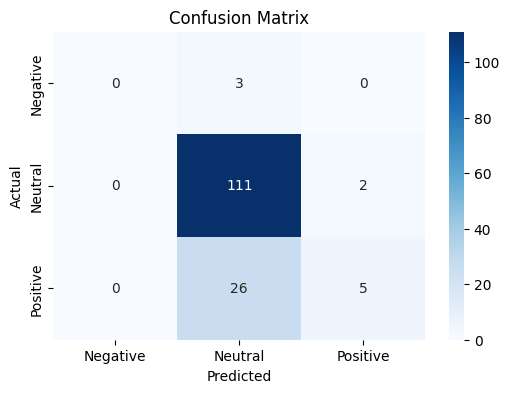

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative','Neutral','Positive'], yticklabels=['Negative','Neutral','Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
